**编写一个基于Web的二手房（选定一个区域即可）价格预测系统，支持：**

1. 从网络上获取二手房数据，进行清洗；

2. 建立模型（线性模型等），训练出一个分类模型；

3. 界面输入房型、房间数、地区等属性，预测该房子的价格；

4. 给出系统中该房型、价格区间相似的房子信息（给出10个以内）；


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("features.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   房间数     2970 non-null   int64  
 1   面积      2970 non-null   float64
 2   单价      2970 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 69.7 KB
None


In [5]:
user_input_rooms = int(input("请输入房间数："))

selected_data = data[data['房间数']==user_input_rooms]


In [7]:
print(len(selected_data))

1383


系数 (斜率): -17.306889859314843
截距: 12190.580857247898


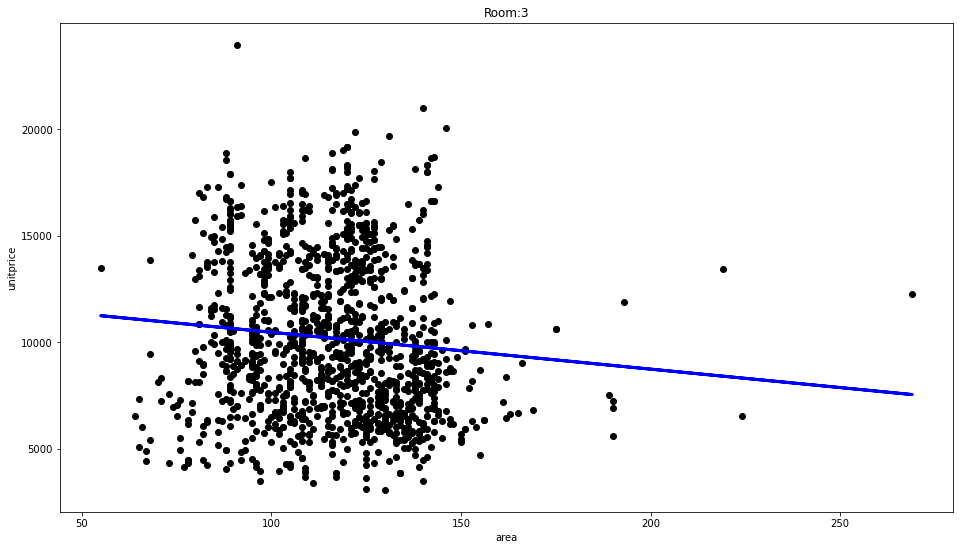

In [11]:
'''
Author: ShAn_3003
Date: 2024-01-05 10:53:40
LastEditTime: 2024-01-05 12:37:48
LastEditors: ShAn_3003
Description: 
FilePath: \ForecastSecondHandHouse\perdict.ipynb
'''
X = selected_data[['面积']]
y = selected_data['单价']

# 建立线性回归模型
model = LinearRegression()
model.fit(X, y)

# 打印模型的系数和截距
print(f"系数 (斜率): {model.coef_[0]}")
print(f"截距: {model.intercept_}")

plt.figure(figsize=(16,9))
# 可视化拟合结果
plt.scatter(X, y, color='black')
plt.plot(X.values, model.predict(X), color='blue', linewidth=3)
plt.xlabel('area')
plt.ylabel('unitprice')
plt.title(f'Room:{user_input_rooms}')
plt.show()

In [14]:
import pandas as pd



rooms = 3

areas = 150


xls = pd.read_excel("data.xlsx",header=1)

xls['房间数']=xls['户型'].str.extract('(\d+)').astype(int)
xls['面积'] = xls['面积'].str.extract('(\d+).?\d*').astype(float)
# 选择相似的房间数和在给定面积范围内上下浮动20的数据
selected_data = xls[
    (xls['房间数'] == rooms) &
    (xls['面积'] >= areas - 20) & 
    (xls['面积'] <= areas + 20)
]

# 获取前十条数据
result = selected_data.head(10)

print(result)


                              地址    户型     面积    单价     总价  关注度      发布时间  \
0              万达广场 房东诚意出售 可随时看房  3室1厅  130.0  6847   89.0    0   1个月以前发布   
22             房东诚意出售看房提前预约房东来开门  3室2厅  143.0  7128  102.0    2   7个月以前发布   
60    经开发万达广场旁 低密度舒适小区 拎包入住 适合刚需  3室2厅  140.0  6108   86.0    4     一年前发布   
67         蔚蓝半岛小区，正规大三房，楼梯三层中间楼层  3室2厅  133.0  7762  104.0    1   7个月以前发布   
70      议价就卖！万达广场旁 电梯小高层大三房 随时看房  3室2厅  132.0  7257   96.0    3   4个月以前发布   
73           采光充足，户型方正，交通便利，出行方便  3室2厅  139.0  8591  119.9    1   4个月以前发布   
92       万达广场旁 锦绣星城电梯小高层大三房 视野开阔  3室2厅  143.0  7993  115.0    0  10个月以前发布   
111           章贡区老城区  江边银盛花园正规三房  3室2厅  133.0  6676   89.0    0   8个月以前发布   
113  章江新区 市政府旁 江南明珠 精装电梯3房 房东诚意售  3室2厅  138.0  9851  136.0    1     一年前发布   
127               黄金花园西区 3室2厅 东南  3室2厅  135.0  6519   88.0    0   2个月以前发布   

                                                    链接  房间数  
0    https://ganzhou.lianjia.com/ershoufang/1031299...    3  
22   https://ganzhou.lianjia